This script performs the analysis of the proteomics data.

In [1]:
import pandas, numpy, seaborn

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition
import scipy, scipy.signal

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40})

### user-defined variables

In [4]:
four_input_file = '/home/adrian/projects/vigur/data/proteomics/HPMVEC_Proteomics_September_2022/HPMVECs_september2022_4h_all_prts_Relative_Quantification.csv'

### define metadata

In [5]:
metadata = {}

metadata['4h control'] = ['20220905_ARNAR_010', '20220905_ARNAR_011', '20220905_ARNAR_035', '20220905_ARNAR_036', '20220905_ARNAR_058', '20220905_ARNAR_059']

metadata['4h epi'] = ['20220905_ARNAR_004', '20220905_ARNAR_005', '20220905_ARNAR_008', '20220905_ARNAR_009', '20220905_ARNAR_051', '20220905_ARNAR_052']


metadata['4h nor'] = ['20220905_ARNAR_013', '20220905_ARNAR_014', '20220905_ARNAR_019', '20220905_ARNAR_020', '20220905_ARNAR_044', '20220905_ARNAR_046']

metadata['4h epinor'] = ['20220905_ARNAR_024', '20220905_ARNAR_025', '20220905_ARNAR_026', '20220905_ARNAR_027']

metadata['4h TNFa'] = ['20220905_ARNAR_060', '20220905_ARNAR_065']

all_sample_names = [element for sublist in list(metadata.values()) for element in sublist]
print(len(all_sample_names))

24


### read data

In [6]:
df4 = pandas.read_csv(four_input_file, index_col=0, skiprows=2, sep=',')
df4.shape

(3183, 85)

### manipulate data

In [7]:
print(df4.shape)
print(df4[df4['Unique peptides'] > 3].shape)
print(df4[(df4['Unique peptides'] > 3) & (df4['Confidence score'] > 40)].shape)

(3183, 85)
(1295, 85)
(1265, 85)


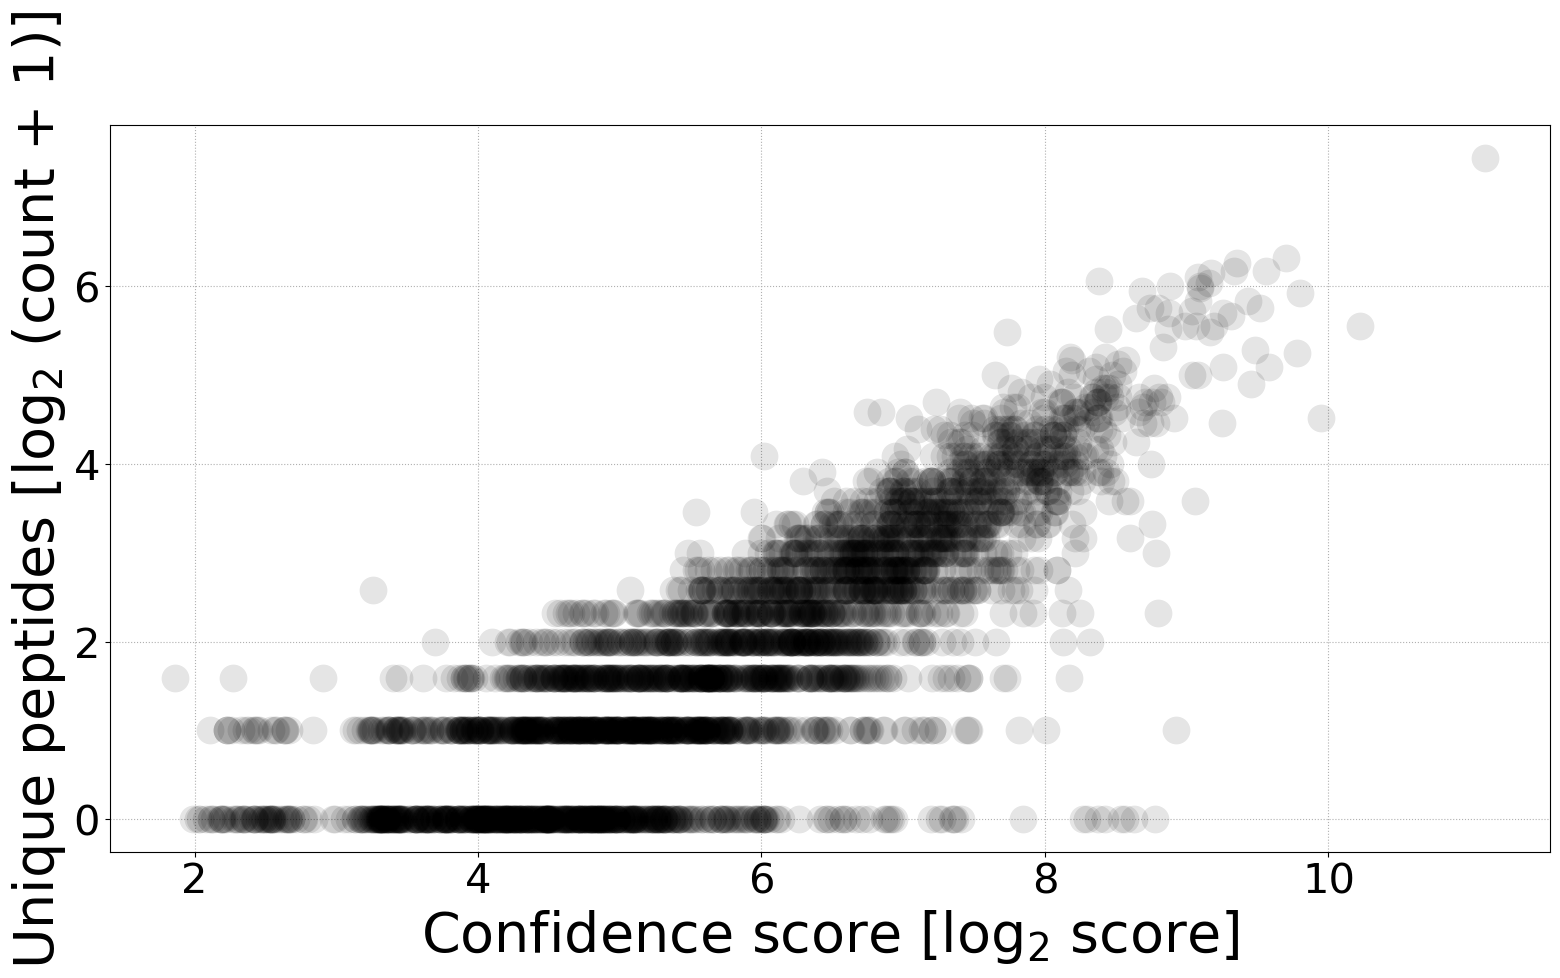

In [8]:
x = numpy.log2(df4['Confidence score'])
y = numpy.log2(df4['Unique peptides']+1)
               
matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/10, markeredgecolor='None', ms=20)

matplotlib.pyplot.xlabel('Confidence score [log$_2$ score]')
matplotlib.pyplot.ylabel('Unique peptides [log$_2$ (count + 1)]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

A very confident threshold would be 2\**7 = 128 for the score and 2\**(3)-1 = 7 unique peptides.

In [9]:
new4 = df4[(df4['Unique peptides'] > 7) & (df4['Confidence score'] > 128)]
print(new4.shape)

working_labels = [label for label in new4.columns if label in all_sample_names]

new4 = numpy.log2(new4.loc[:, working_labels] + 1)
print(new4.shape)
new4

(529, 85)
(529, 24)


,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.045552,16.078366,16.161570,16.156538,16.229749,16.211154,15.643942,15.675235,15.817460,15.806405,...,16.285414,16.314586,16.509939,16.298168,16.384911,16.406426,16.328664,16.354238,16.145720,16.125135
Q9NVA2,12.240767,12.273150,12.230812,12.246755,12.321591,12.283944,12.229056,12.302041,12.452724,12.257791,...,12.362618,12.350376,12.322057,12.265512,12.272261,12.319145,12.297600,12.287144,12.600883,12.612712
P09382,16.043690,16.115637,16.117788,16.162780,16.369342,16.357563,16.185005,16.186321,16.538914,16.523372,...,16.308708,16.349512,16.634492,16.594343,16.689482,16.719676,16.648384,16.712877,17.017069,16.935930
P08670;O95235,18.548527,18.594227,18.365704,18.401135,18.769989,18.770524,18.262122,18.297352,18.711359,18.702104,...,18.696273,18.744594,18.883915,18.934645,19.082979,19.116051,19.065795,19.135832,19.375205,19.166476
P21589,14.236305,14.287893,14.327785,14.336909,14.448410,14.403935,14.113794,14.151376,14.502139,14.501312,...,14.461924,14.499079,14.841703,14.730324,14.702377,14.704367,14.591211,14.620202,15.063077,14.952013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P49915,12.680081,12.692114,12.765810,12.732837,12.848963,12.815977,12.709541,12.711505,12.841297,12.692557,...,12.696951,12.705768,12.850038,12.886218,12.845724,12.825786,12.765547,12.767343,12.679482,12.905236
P18031,13.711701,13.775002,13.712291,13.738313,14.745789,14.804210,13.757445,13.799717,14.333014,14.314651,...,14.262292,14.327880,14.556140,14.271732,14.084215,14.125955,14.223263,14.268793,14.512509,13.644973
Q06323,11.854487,11.791975,11.886068,11.874950,11.765173,11.656666,11.955888,11.850552,11.867215,11.765737,...,11.617859,11.592352,11.752562,12.165017,11.717026,11.684389,11.821624,11.779782,11.525348,12.207274


### visualize data

200
19.492541086884188


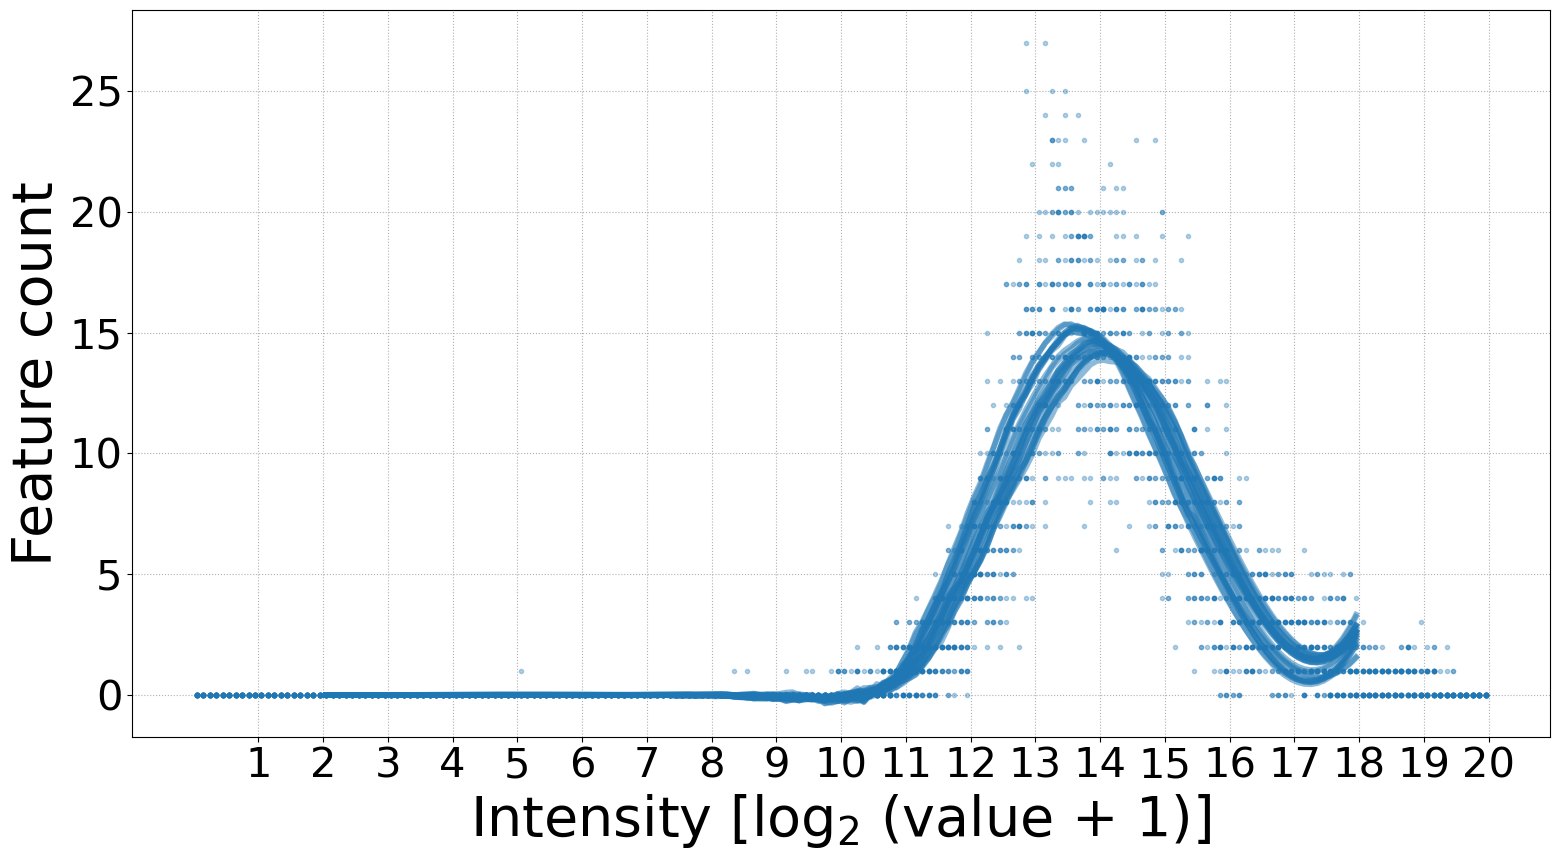

In [10]:
found_max = 20
number_of_bins = found_max * 10
margin = 20
print(number_of_bins)

absolute_max = 0
plotting_x = []; plotting_y = []
most_likely_early = []

for sample in new4.columns:
        
    intensities = new4.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(intensities, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # storing info to quantify bias
    most_likely_intensity = x[numpy.argmax(yhat)]
    most_likely_early.append(most_likely_intensity)
    
    
    # plotting
    the_color = 'tab:blue'
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, color=the_color)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color=the_color)
    
    # check
    if max(intensities) > absolute_max:
        absolute_max = max(intensities)

# check print
print(absolute_max)

matplotlib.pyplot.xticks(range(1, 21))
matplotlib.pyplot.xlabel('Intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

### normalization

In [11]:
#
# quantile normalization 
# taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
#

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(new4.values, axis=0), index=new4.index, columns=new4.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
qndf = new4.rank(method="min").stack().astype(int).map(df_mean).unstack()

### distributions after normalization

In [12]:
qndf

,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.444593,16.372551,16.421613,16.344206,16.080066,16.127816,16.021224,15.963456,15.660162,15.681853,...,16.372551,16.372551,16.127816,15.940934,16.204469,16.296996,16.204469,16.204469,15.940934,15.761133
Q9NVA2,12.433890,12.433890,12.310138,12.323821,12.294635,12.216512,12.294635,12.372383,12.402299,12.275970,...,12.383886,12.372383,12.216512,12.197610,12.246562,12.294635,12.246562,12.236532,12.566202,12.527002
P09382,16.393933,16.462837,16.344206,16.393933,16.204469,16.344206,16.519916,16.482092,16.444593,16.502481,...,16.421613,16.421613,16.372551,16.393933,16.568323,16.600260,16.542327,16.542327,16.777160,16.568323
P08670;O95235,18.804393,18.804393,18.804393,18.804393,18.648104,18.804393,18.804393,18.648104,18.510957,18.648104,...,18.804393,18.804393,18.648104,18.804393,18.804393,18.804393,18.804393,18.804393,19.071344,18.648104
P21589,14.585818,14.628717,14.555990,14.555990,14.317816,14.317816,14.312082,14.337290,14.403906,14.417812,...,14.537198,14.555990,14.605351,14.503707,14.675768,14.675768,14.527606,14.537198,14.876730,14.628717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P49915,12.906680,12.917899,12.917899,12.883281,12.702311,12.768432,12.799048,12.768432,12.799048,12.680782,...,12.779876,12.799048,12.692688,12.692688,12.850109,12.815421,12.725669,12.692688,12.662844,12.745801
P18031,13.977685,14.068160,13.916770,13.940537,14.596988,14.703284,13.940537,13.952260,14.200837,14.219393,...,14.342615,14.389692,14.300598,14.035750,14.081197,14.105334,14.143856,14.170751,14.377244,13.428684
Q06323,11.980800,11.956009,12.036477,12.036477,11.744678,11.678427,12.009373,11.931838,11.766999,11.744678,...,11.744678,11.715967,11.510847,12.074167,11.766999,11.678427,11.787188,11.744678,11.554459,12.179500


200
19.071343768957153


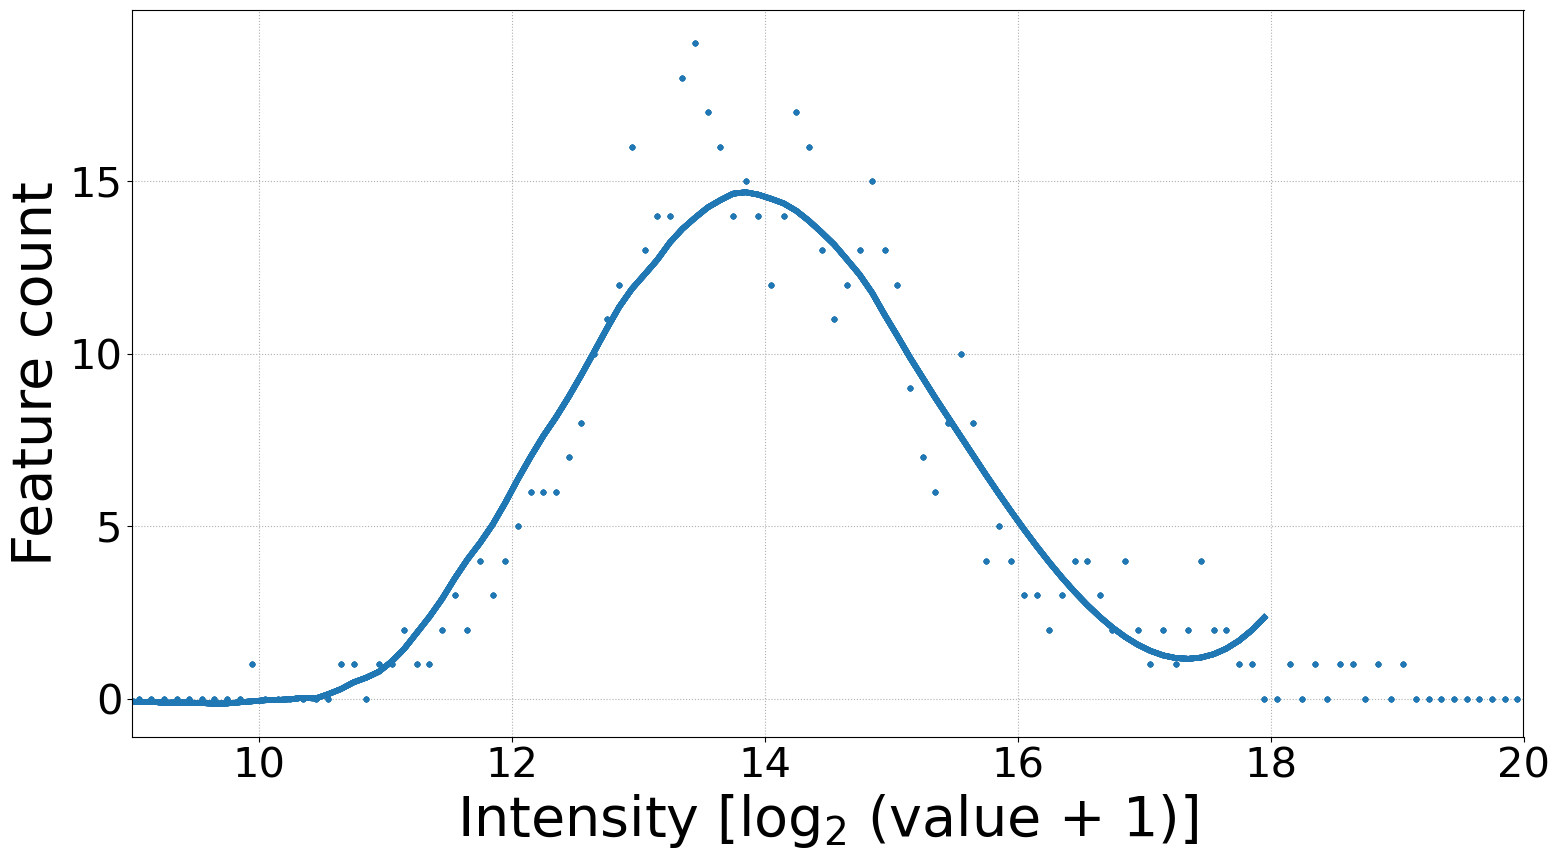

In [13]:
found_max = 20
number_of_bins = found_max * 10
margin = 20
print(number_of_bins)

absolute_max = 0
plotting_x = []; plotting_y = []
most_likely_early = []

for sample in qndf.columns:
        
    intensities = qndf.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(intensities, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # storing info to quantify bias
    most_likely_intensity = x[numpy.argmax(yhat)]
    most_likely_early.append(most_likely_intensity)
    
    
    # plotting
    the_color = 'tab:blue'
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, color=the_color)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color=the_color)
    
    # check
    if max(intensities) > absolute_max:
        absolute_max = max(intensities)

# check print
print(absolute_max)

#matplotlib.pyplot.xticks(range(1, 21))
matplotlib.pyplot.xlim(9,20)

matplotlib.pyplot.xlabel('Intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

### PCA

In [25]:
qndf

,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.444593,16.372551,16.421613,16.344206,16.080066,16.127816,16.021224,15.963456,15.660162,15.681853,...,16.372551,16.372551,16.127816,15.940934,16.204469,16.296996,16.204469,16.204469,15.940934,15.761133
Q9NVA2,12.433890,12.433890,12.310138,12.323821,12.294635,12.216512,12.294635,12.372383,12.402299,12.275970,...,12.383886,12.372383,12.216512,12.197610,12.246562,12.294635,12.246562,12.236532,12.566202,12.527002
P09382,16.393933,16.462837,16.344206,16.393933,16.204469,16.344206,16.519916,16.482092,16.444593,16.502481,...,16.421613,16.421613,16.372551,16.393933,16.568323,16.600260,16.542327,16.542327,16.777160,16.568323
P08670;O95235,18.804393,18.804393,18.804393,18.804393,18.648104,18.804393,18.804393,18.648104,18.510957,18.648104,...,18.804393,18.804393,18.648104,18.804393,18.804393,18.804393,18.804393,18.804393,19.071344,18.648104
P21589,14.585818,14.628717,14.555990,14.555990,14.317816,14.317816,14.312082,14.337290,14.403906,14.417812,...,14.537198,14.555990,14.605351,14.503707,14.675768,14.675768,14.527606,14.537198,14.876730,14.628717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P49915,12.906680,12.917899,12.917899,12.883281,12.702311,12.768432,12.799048,12.768432,12.799048,12.680782,...,12.779876,12.799048,12.692688,12.692688,12.850109,12.815421,12.725669,12.692688,12.662844,12.745801
P18031,13.977685,14.068160,13.916770,13.940537,14.596988,14.703284,13.940537,13.952260,14.200837,14.219393,...,14.342615,14.389692,14.300598,14.035750,14.081197,14.105334,14.143856,14.170751,14.377244,13.428684
Q06323,11.980800,11.956009,12.036477,12.036477,11.744678,11.678427,12.009373,11.931838,11.766999,11.744678,...,11.744678,11.715967,11.510847,12.074167,11.766999,11.678427,11.787188,11.744678,11.554459,12.179500


[0.32277237 0.16248712]


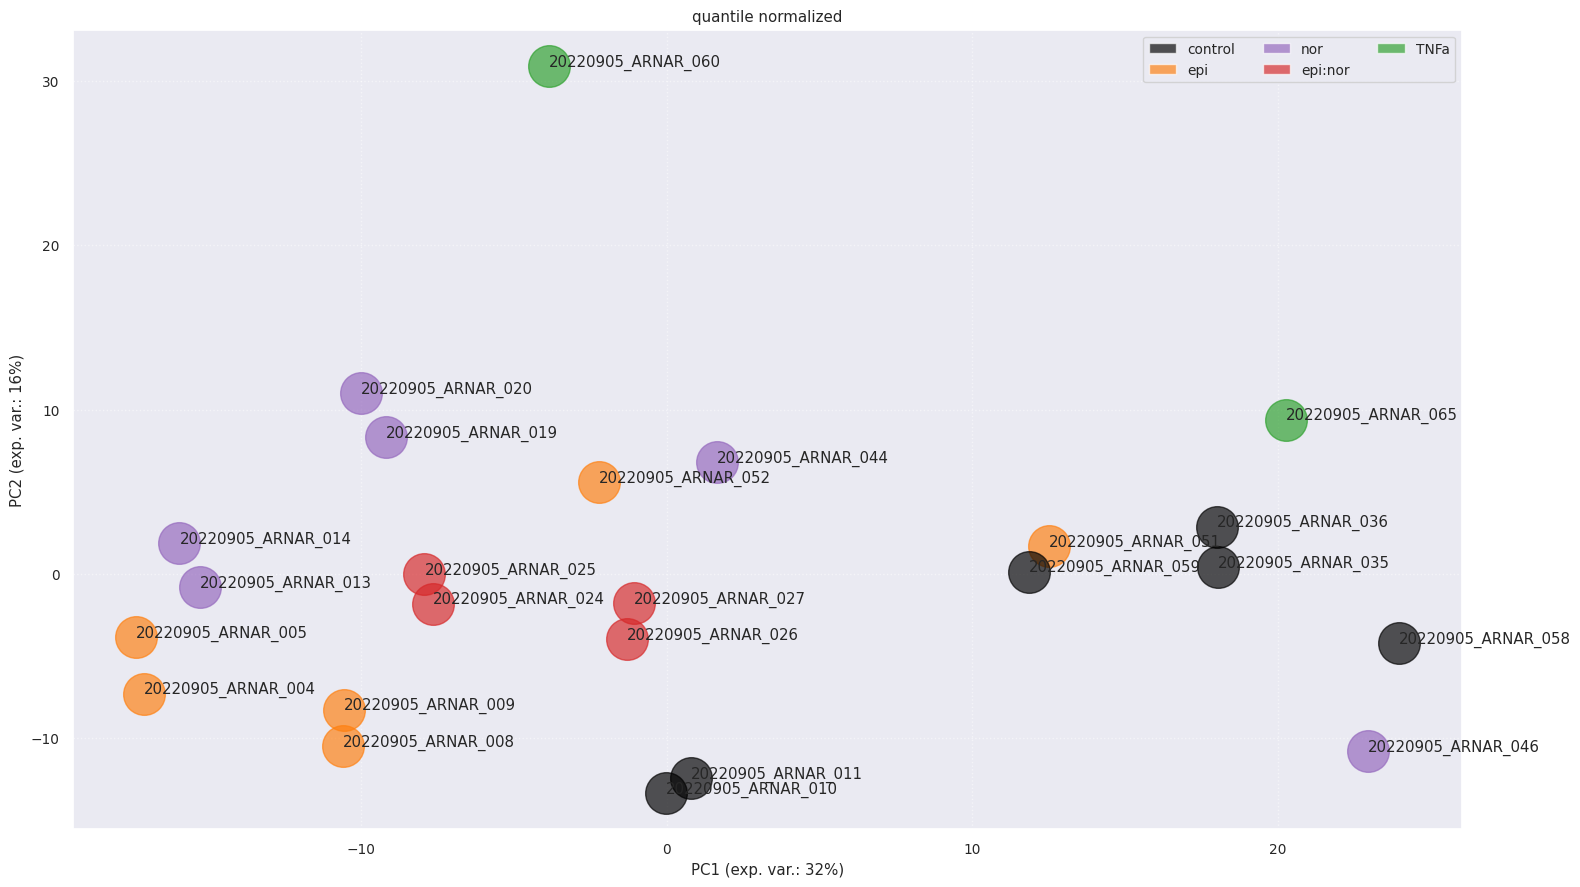

In [27]:
# quantile normalized all
transpose = qndf.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    the_marker = 'o'
    the_label = qndf.columns[i]
        
    if qndf.columns[i] in metadata['4h control']:
        the_color = 'black'
    elif qndf.columns[i] in metadata['4h epi']:
        the_color = 'tab:orange'
    elif qndf.columns[i] in metadata['4h nor']:
        the_color = 'tab:purple'
    elif qndf.columns[i] in metadata['4h epinor']:
        the_color = 'tab:red'
    elif qndf.columns[i] in metadata['4h TNFa']:
        the_color = 'tab:green'
    else:
        raise ValueError('sample not classified')
    
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker=the_marker, alpha=2/3)
    matplotlib.pyplot.text(locations[i, 0], locations[i, 1], the_label)
    
    
legend_elements = [ 
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:purple', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=3)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('quantile normalized')
matplotlib.pyplot.tight_layout()

[0.6777202  0.09270573]


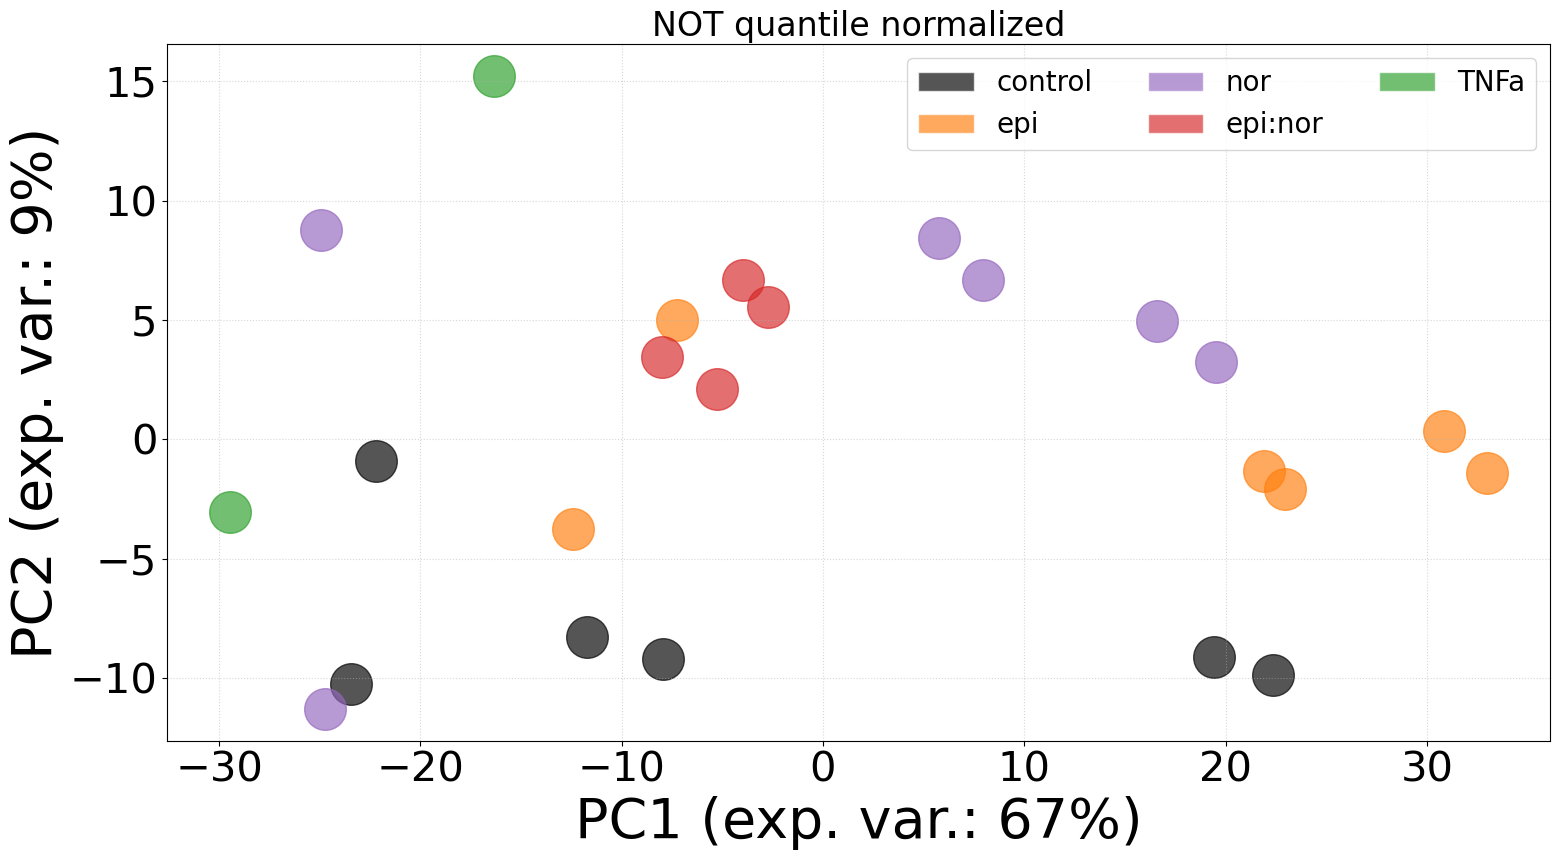

In [20]:
# non-quantile normalized all
transpose = new4.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    the_marker = 'o'
        
    if qndf.columns[i] in metadata['4h control']:
        the_color = 'black'
    elif qndf.columns[i] in metadata['4h epi']:
        the_color = 'tab:orange'
    elif qndf.columns[i] in metadata['4h nor']:
        the_color = 'tab:purple'
    elif qndf.columns[i] in metadata['4h epinor']:
        the_color = 'tab:red'
    elif qndf.columns[i] in metadata['4h TNFa']:
        the_color = 'tab:green'
    else:
        raise ValueError('sample not classified')
        
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker=the_marker, alpha=2/3)
    
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:purple', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=3)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('NOT quantile normalized')

matplotlib.pyplot.tight_layout()

### compute sample correlations

Certain rules to follow up: significance and fold-change. Present Venn diagrams and volcano plots

0.953627320399479


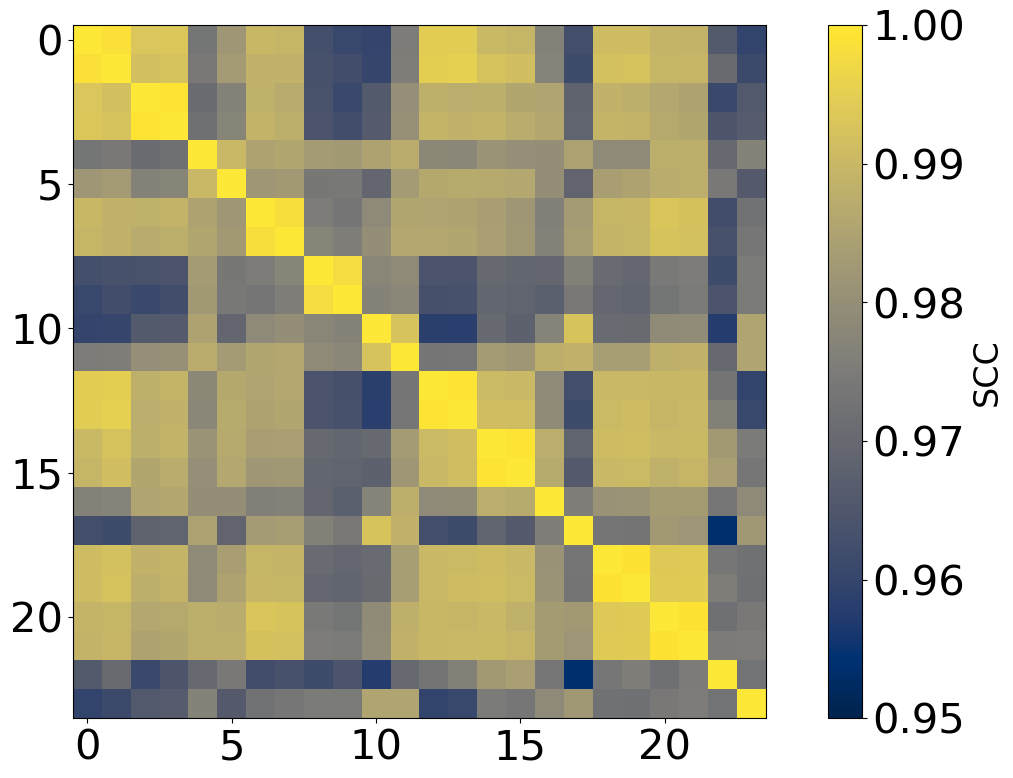

In [22]:
z = len(qndf.columns)
M = numpy.ones((z, z))
    
for i in range(len(qndf.columns)):
    for j in range(len(qndf.columns)):
        
        sample_a = qndf.columns[i]
        sample_b = qndf.columns[j]
        
        values_a =  qndf.loc[:, sample_a].values
        values_b = qndf.loc[:, sample_b].values
        
        # select only the central part of the distribution, from 8 to 16
        subset_a = []; subset_b = []
        for k in range(len(values_a)):
            if 12 <= values_a[k] <= 16 and 12 <= values_b[k] <= 16:
                subset_a.append(values_a[k]); subset_b.append(values_b[k])
        
        # size
        rho, pval = scipy.stats.spearmanr(subset_a, subset_b)
        M[i, j] = rho

print(numpy.min(M))

matplotlib.pyplot.imshow(M, interpolation='none', cmap='cividis', vmin=0.95, vmax=1.)
cbar = matplotlib.pyplot.colorbar()
cbar.set_label('SCC',size=24)

In [23]:
labels = []
for sample in all_sample_names:
    if sample in metadata['4h control']:
        labels.append('control')
    elif sample in metadata['4h epi']:
        labels.append('epi')
    elif sample in metadata['4h nor']:
        labels.append('nor')
    elif sample in metadata['4h epinor']:
        labels.append('epi:nor')
    elif sample in metadata['4h TNFa']:
        labels.append('TNFa')
    else:
        raise ValueError('not classified')

df = pandas.DataFrame(M, index=labels, columns=labels)

linkage_method = 'complete'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(df, cmap='cividis')

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

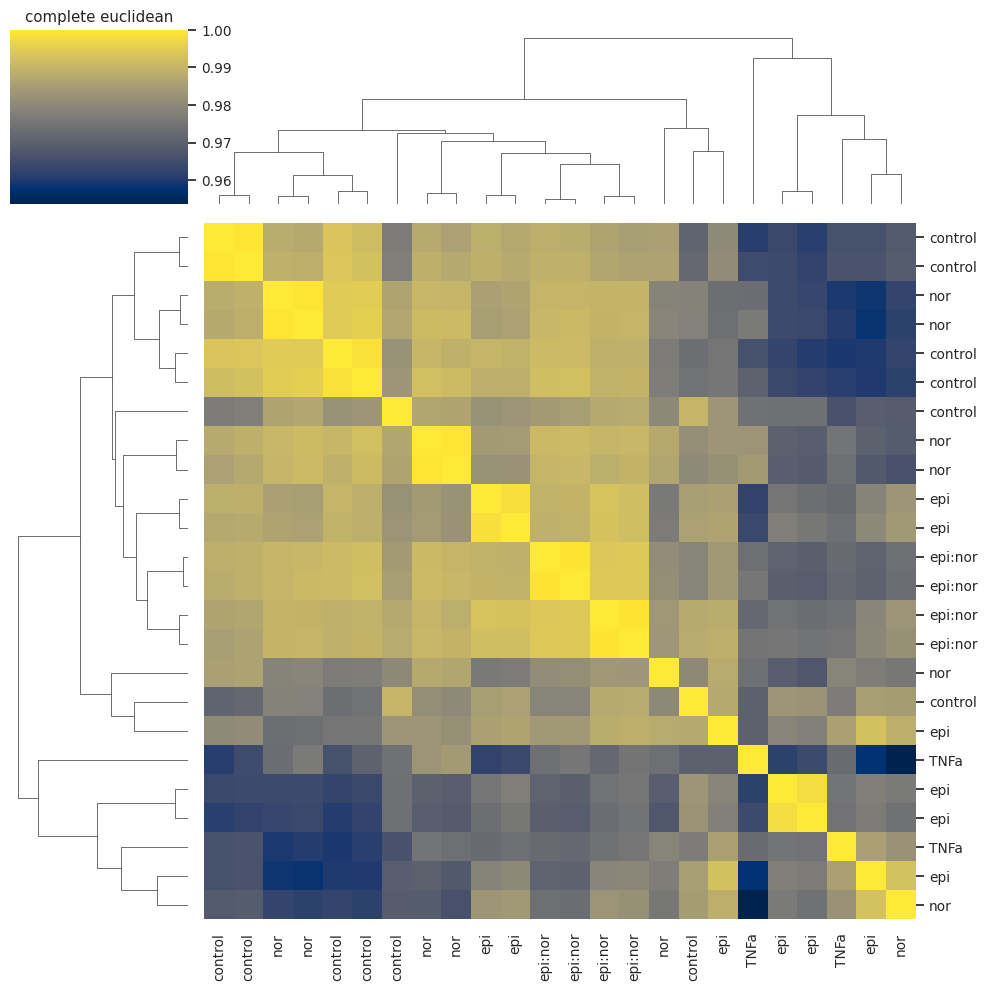

In [ ]:
# BH and limma should be implemented

In [ ]:
# Venn diagram due to time only

In [ ]:
# Venn diagram due to epi at 4 h and 24 h

In [ ]:
# Venn diagram due to nor at 4 h and 24 h

In [ ]:
# Venn diagram due to epi:nor at 4 h and 24 h

In [ ]:
# Venn diagram due to TNFa at 4 h and 24 h

In [ ]:
# Venn diagram of epi, nor, epi:nor at 4 h

In [ ]:
# Venn diagram of epi, nor, epi:nor at 24 h

In [ ]:
# run a correlation of samples to see if there is a flip